In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
import comparer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random

In [3]:
file_path = "../Datasets/300events_manual_new_table_format.xlsx"
table = pd.read_excel(file_path, dtype="str", sheet_name="300events_manual") \
          .replace({np.nan: None, "NULL": None})
table

,Event_ID,Event_Type,Source,Event_Name,Location,Single_Date,Date,Start_Date,End_Date,Total_Deaths,...,Total_Affected,Insured_Damage,Insured_Damage_Units,Insured_Damage_Inflation_Adjusted,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Units,Total_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged
0,846,None,https://en.wikipedia.org/wiki/Cyclone_Monica,Cyclone Monica,Papua New Guinea|Queensland & Northern Territ...,None,16 April 2006 - 28 April 2006,2006-04-16 00:00:00,2006-04-28 00:00:00,0,...,None,None,None,None,None,5100000,USD,YES,2006,12
1,3516,None,https://en.wikipedia.org/wiki/Electra_Fire_(2022),Electra Fire (2022),Mokelumne Hill&Amador&Calaveras Counties&Cali...,None,"July 4, 2022.to July 28, 2022.",2022-07-04 00:00:00,2022-07-28 00:00:00,0,...,None,None,None,None,None,None,None,None,None,921
2,2184,None,https://en.wikipedia.org/wiki/2008_Queensland_...,2008 Queensland storms,South East Queensland&Australia,None,"16,19,20 November 2008",2008-11-16 00:00:00,2008-11-20 00:00:00,2,...,None,95000000,AUD,NO,None,500000000,AUD,YES,2008,4130
3,2824,None,https://en.wikipedia.org/wiki/Typhoon_Sepat,Typhoon Sepat,Philippines|Taiwan&China,None,"\tAugust 12-24, 2007",2007-08-12 00:00:00,2007-08-24 00:00:00,43,...,None,None,None,None,None,693000000,USD,YES,2007,None
4,596,None,https://en.wikipedia.org/wiki/2021_Western_Nor...,2021 Western North America heat wave,Central and Southern California&Northern Cali...,None,"June 25, 2021 -July 7, 2021",2021-06-25 00:00:00,2021-07-07 00:00:00,914,...,None,None,None,None,None,8900000000,USD,YES,2021,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,824,None,https://en.wikipedia.org/wiki/1893_San_Roque_h...,1893 San Roque hurricane,Lesser Antilles|Puerto Rico|New England&the Un...,None,"\tAugust 13, 1893-August 22, 1893",8/13/1893,8/22/1893,37,...,None,None,None,None,None,None,None,None,None,64
244,2734,None,https://en.wikipedia.org/wiki/Typhoon_Isa,Typhoon Isa,Pohnpei|Guam|Rota,None,"\tApril 12, 1997-April 24, 1997",1997-04-12 00:00:00,1997-04-24 00:00:00,0,...,None,None,None,None,None,1000000,USD,NO,None,None
245,1056,None,https://en.wikipedia.org/wiki/Cyclone_Yasa,Cyclone Yasa,Vanuatu|Fiji|Tonga,None,"\tDecember 11, 2020-December 24, 2020",2020-12-11 00:00:00,2020-12-24 00:00:00,4,...,None,None,None,None,None,247000000,USD,YES,2020,4200
246,1057,None,https://en.wikipedia.org/wiki/Cyclone_Hola,Cyclone Hola,Fiji|Vanuatu|New Caledonia|New Zealand,None,\t3 March 2018-13 March 2018,2018-03-03 00:00:00,2018-03-13 00:00:00,3,...,None,None,None,None,None,5660000,USD,YES,2018,1467


In [4]:
# Specify null penalty
null_penalty = 1
# Specify item weights
weights = {
         "Event_Type": 0,
         "Event_Name": 1,
         "Insured_Damage_Units": 1,
         "Total_Damage_Units": 1,
         "Location": 1,
         "Single_Date": 1,
         "Start_Date": 1,
         "End_Date": 1,
         "Total_Deaths": 1,
         "Num_Injured": 1,
         "Displaced_People": 1,
         "Num_Homeless": 1,
         "Total_Affected": 1,
         "Insured_Damage": 1,
         "Insured_Damage_Inflation_Adjusted_Year": 1,
         "Total_Damage": 1,
         "Total_Damage_Inflation_Adjusted_Year": 1,
         "Buildings_Damaged": 1,
         "Insured_Damage_Inflation_Adjusted": 1,
         "Total_Damage_Inflation_Adjusted": 1}

# Instantiate comparer
comp = comparer.Comparer(null_penalty)
# Convert to list of dictionaries
events = table.to_dict('records')
# Compare all pairs of events
pairs = itertools.combinations(events, 2)
comps = [[v["Event_ID"], w["Event_ID"], comp.weighted(v, w, weights), comp.all(v, w)] for (v, w) in pairs]
all_comps = pd.DataFrame([[i, j, c, d] + list(a.values()) for [i, j, (c, d), a] in comps], 
                         columns=["Event_ID1", "Event_ID2", "Coverage", "Weighted_Score"] + 
                         list(weights.keys())).replace({np.nan: None})
all_comps

,Event_ID1,Event_ID2,Coverage,Weighted_Score,Event_Type,Event_Name,Insured_Damage_Units,Total_Damage_Units,Location,Single_Date,...,Displaced_People,Num_Homeless,Total_Affected,Insured_Damage,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged,Insured_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted
0,846,3516,0.421053,0.906752,None,1,None,1.0,1.0,None,...,None,None,None,None,None,1.0,1.0,0.974277,None,1.0
1,846,2184,0.263158,0.841036,None,1,1.0,1.0,0.8,None,...,None,None,None,1.0,None,0.979806,0.000498,0.994206,1.0,0.0
2,846,2824,0.421053,0.725967,None,1,None,0.0,1.0,None,...,None,None,None,None,None,0.985389,0.000249,1.0,None,0.0
3,846,596,0.368421,0.750215,None,1,None,0.0,1.0,None,...,1.0,None,None,None,None,0.998855,0.003725,1.0,None,0.0
4,846,2551,0.368421,0.73738,None,1,None,0.0,1.0,None,...,1.0,None,None,None,None,0.864181,0.000249,0.984127,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30623,2734,1057,0.421053,0.881791,None,1,None,0.0,1.0,None,...,None,None,None,None,None,0.6997,1.0,1.0,None,1.0
30624,2734,1054,0.473684,0.899998,None,1,None,0.0,1.0,None,...,None,None,None,None,None,0.999977,1.0,None,None,1.0
30625,1056,1057,0.421053,0.561892,None,1,None,0.0,0.6,None,...,None,None,None,None,None,0.955197,0.000495,0.482266,None,0.0
30626,1056,1054,0.473684,0.659461,None,1,None,0.0,1.0,None,...,None,None,None,None,None,0.994364,0.000248,1.0,None,0.0


In [5]:
# Print sorted by weighted score
all_comps.sort_values("Weighted_Score")

,Event_ID1,Event_ID2,Coverage,Weighted_Score,Event_Type,Event_Name,Insured_Damage_Units,Total_Damage_Units,Location,Single_Date,...,Displaced_People,Num_Homeless,Total_Affected,Insured_Damage,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged,Insured_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted
18195,2975,2947,0.368421,0.038462,None,0,None,0.0,0.461538,None,...,0.0,0.0,None,None,None,0.0,0.0,0.0,None,0.0
6839,2295,2294,0.421053,0.109242,None,0,None,0.0,0.2,None,...,None,None,None,None,None,0.0,0.0,0.001664,None,0.0
23869,2454,2350,0.473684,0.391645,None,1,None,0.0,0.8,None,...,None,None,None,None,None,0.037037,0.002493,0.076923,None,0.0
17065,2009,2011,0.736842,0.4,None,0,None,None,0.0,None,...,None,None,None,None,None,None,None,None,None,None
7238,963,899,0.421053,0.42563,None,1,None,0.0,1.0,None,...,None,None,None,None,None,0.082569,0.000744,0.302146,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25941,1113,1787,0.473684,1.0,None,1,None,1.0,1.0,None,...,None,None,None,None,None,1.0,1.0,1.0,None,1.0
25939,1113,2011,0.684211,1.0,None,1,None,None,1.0,None,...,None,None,None,None,None,None,None,1.0,None,None
25938,1113,463,0.684211,1.0,None,1,None,None,1.0,None,...,None,None,None,None,None,None,None,1.0,None,None
25952,1113,221,0.631579,1.0,None,1,None,None,1.0,1.0,...,None,None,None,None,None,None,None,1.0,None,None


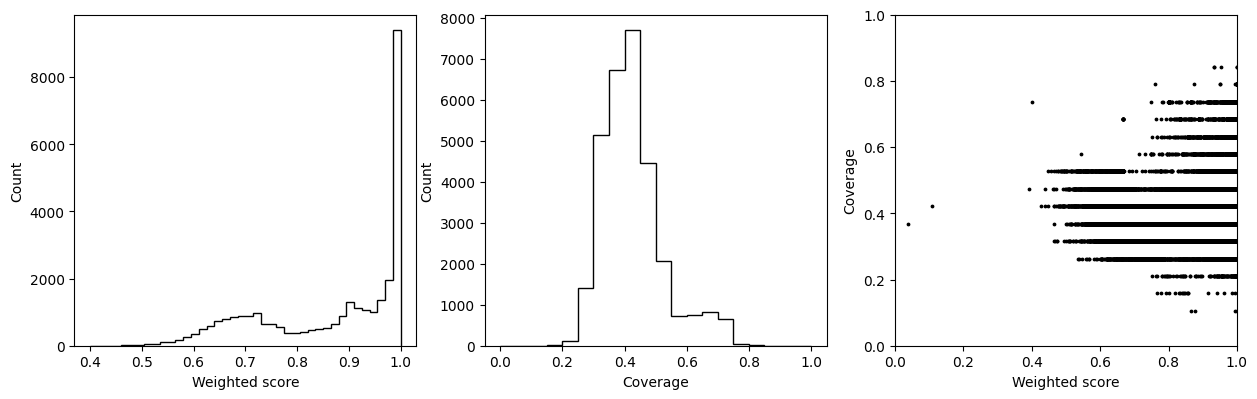

In [6]:
# Plot histograms and scatter plots of weighted scores and coverages
def plot_hist(c, l, a, b, r=(0, 1)):
    all_comps.plot.hist(column=[c], bins=b, range=r, color="Black", legend=False, 
                        xlabel=l, ylabel="Count", histtype="step", ax=axes[a])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.3))
plot_hist("Weighted_Score", "Weighted score", 0, 40, (0.4, 1))
plot_hist("Coverage", "Coverage", 1, 20, (0, 1))
p = all_comps.plot.scatter(x="Weighted_Score", y="Coverage", c="Black", s=3, xlim=(0, 1), ylim=(0, 1), 
                           xlabel="Weighted score", ylabel="Coverage", ax=axes[2])

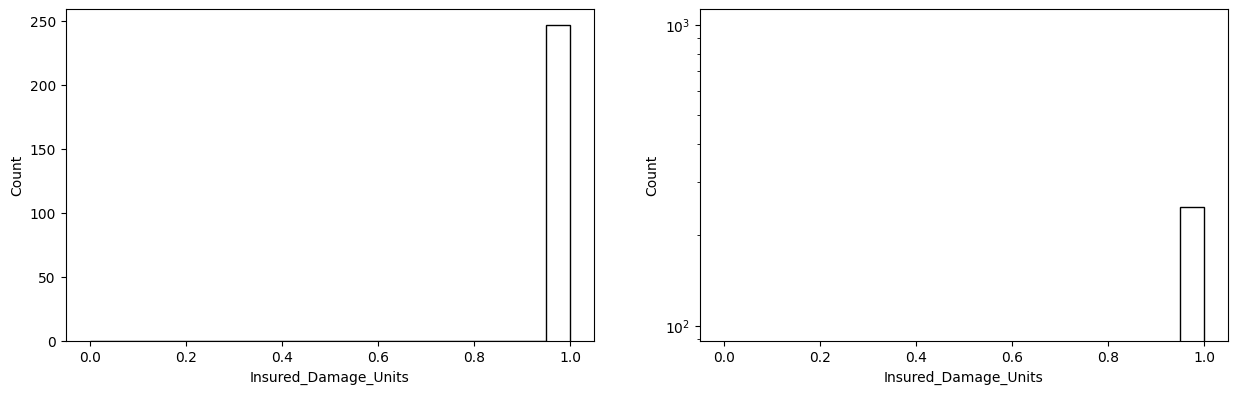

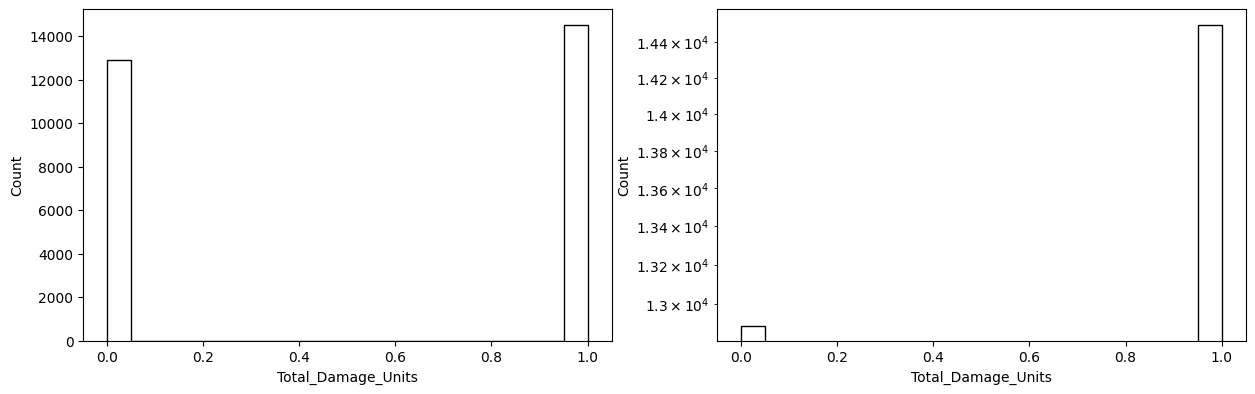

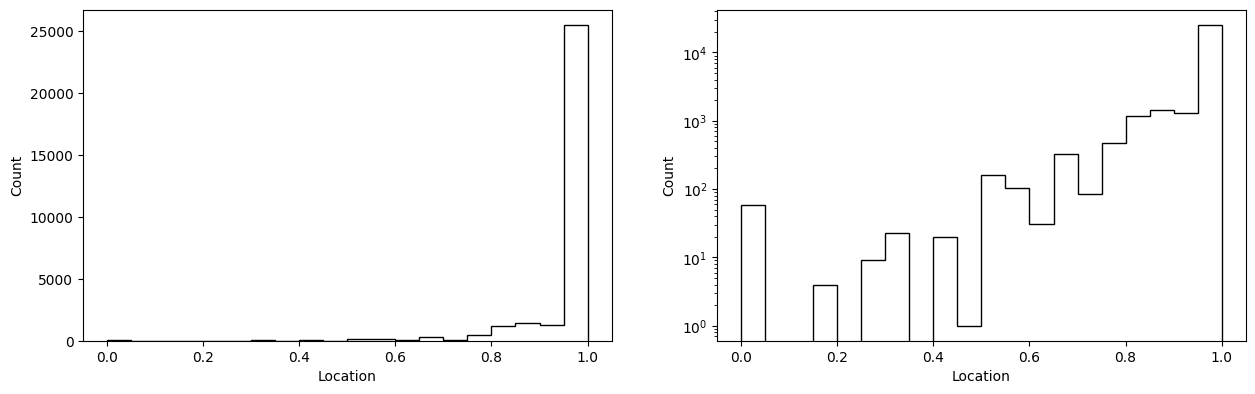

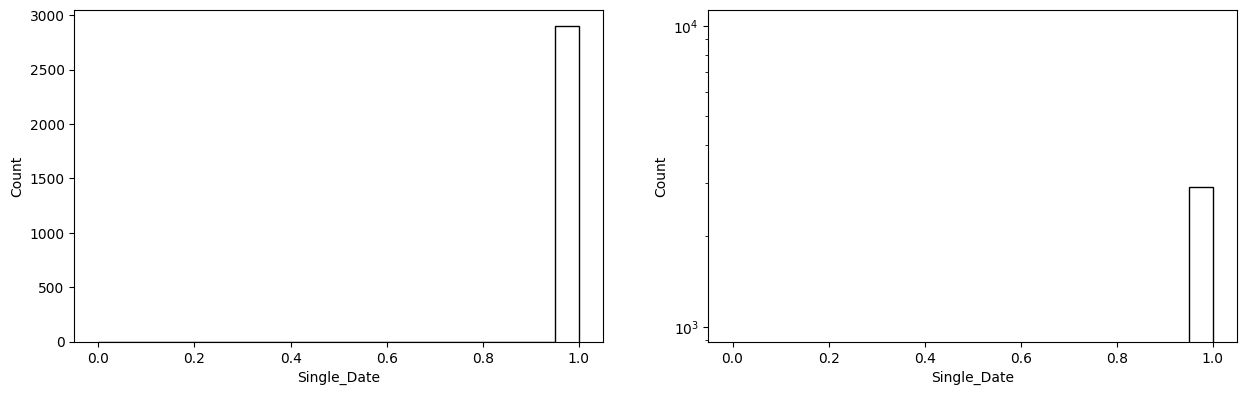

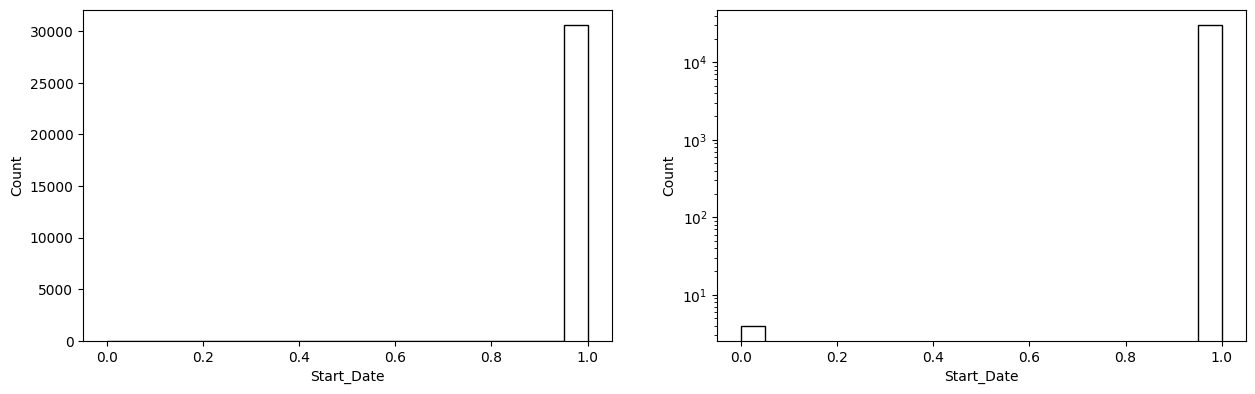

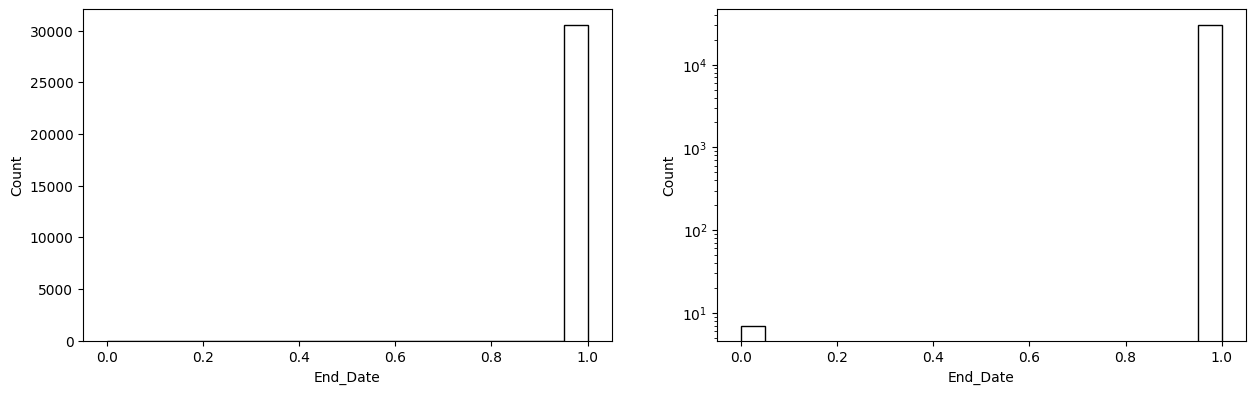

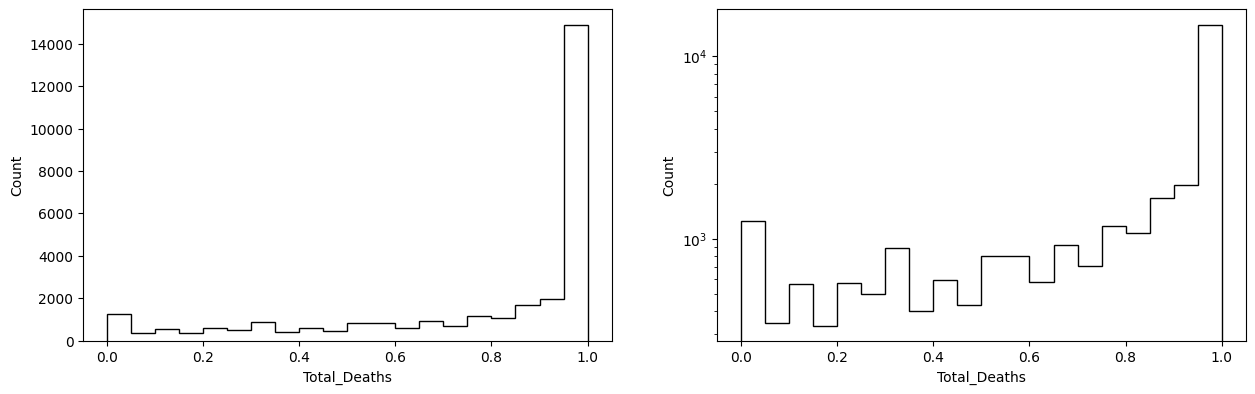

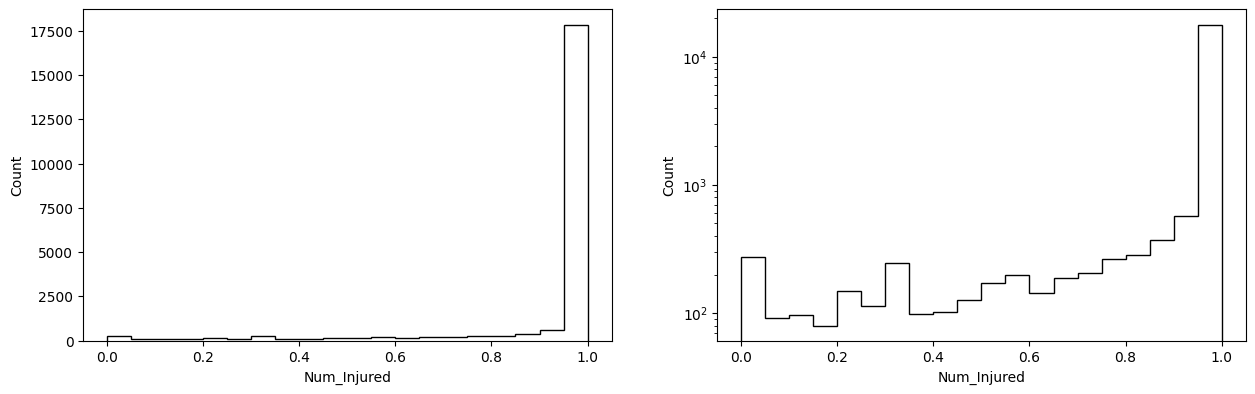

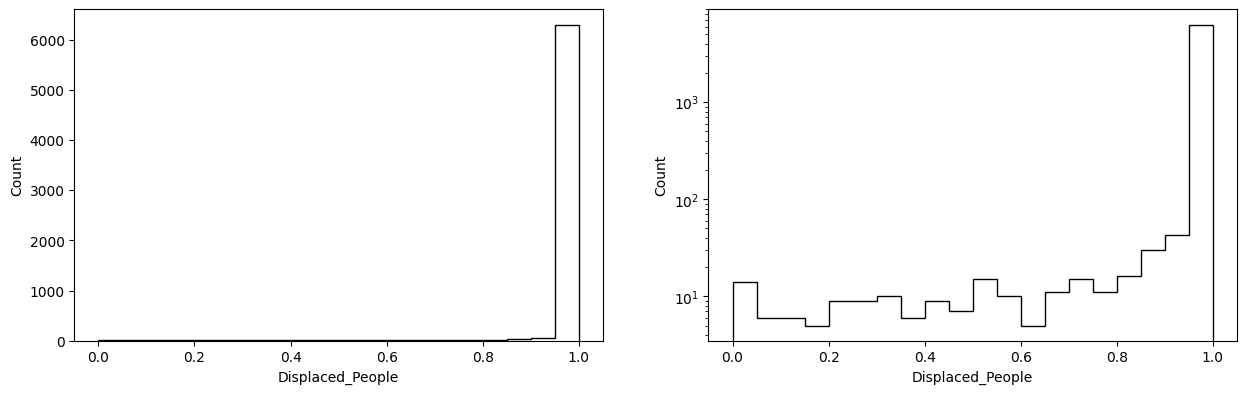

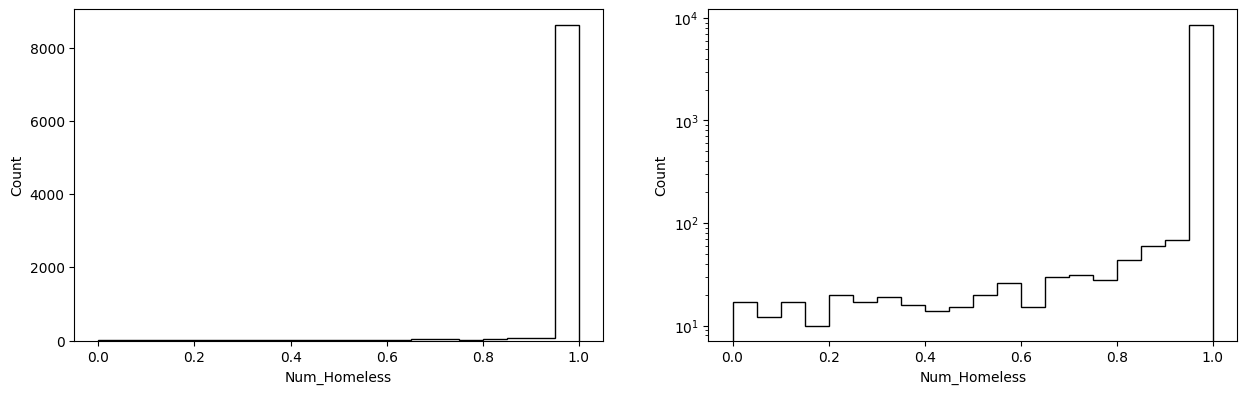

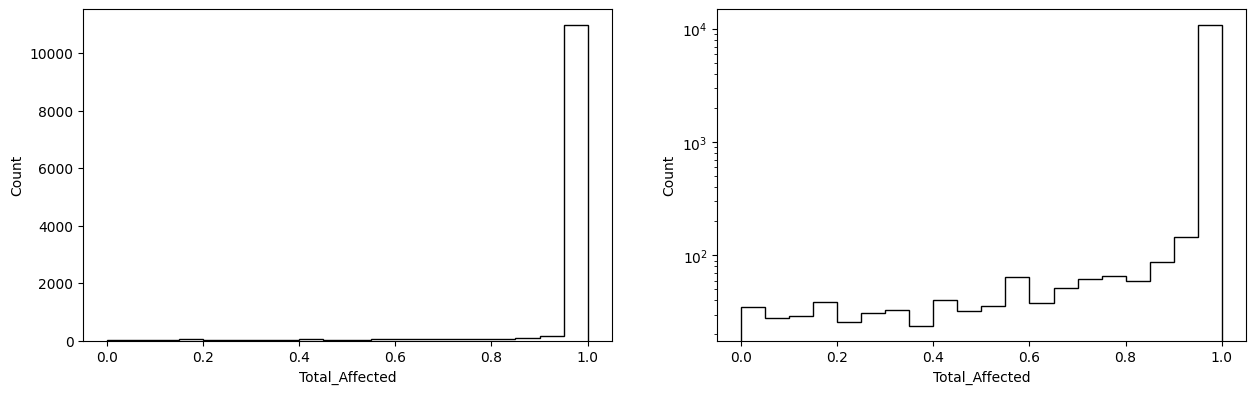

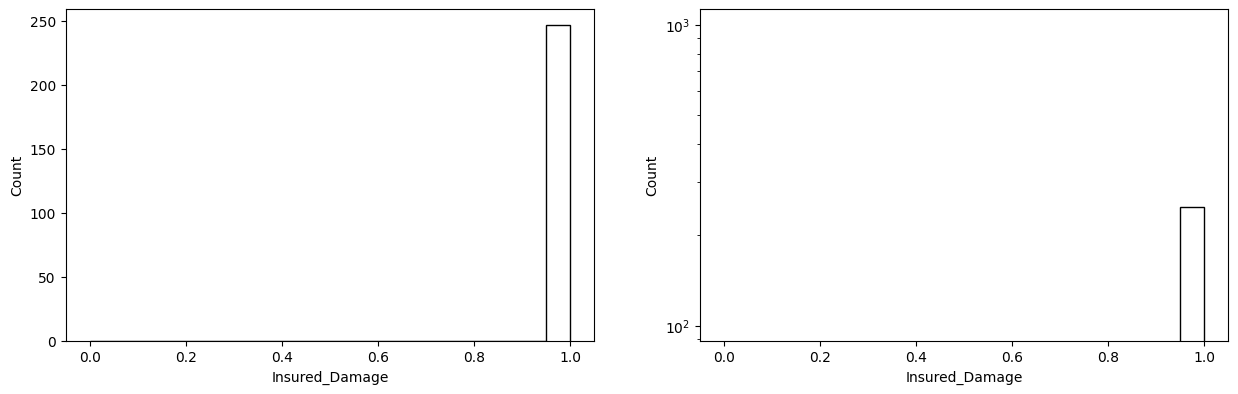

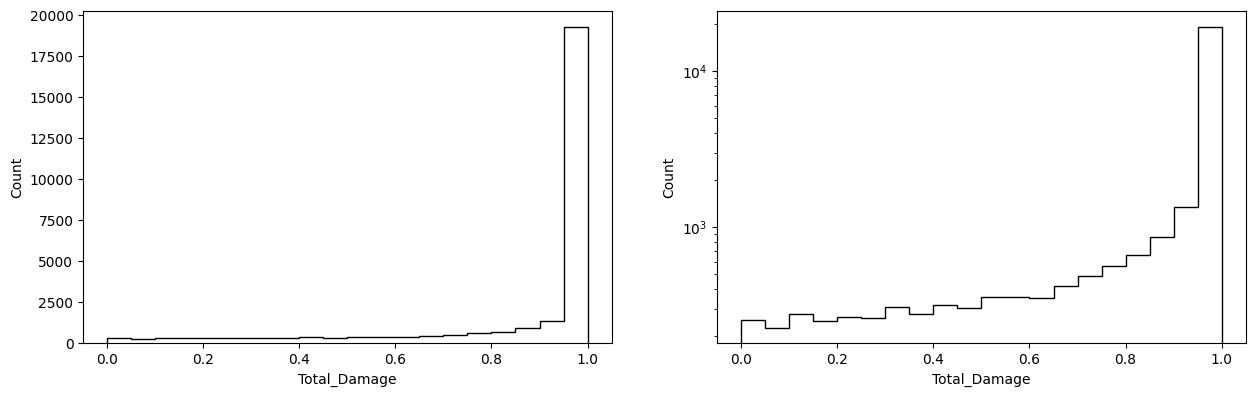

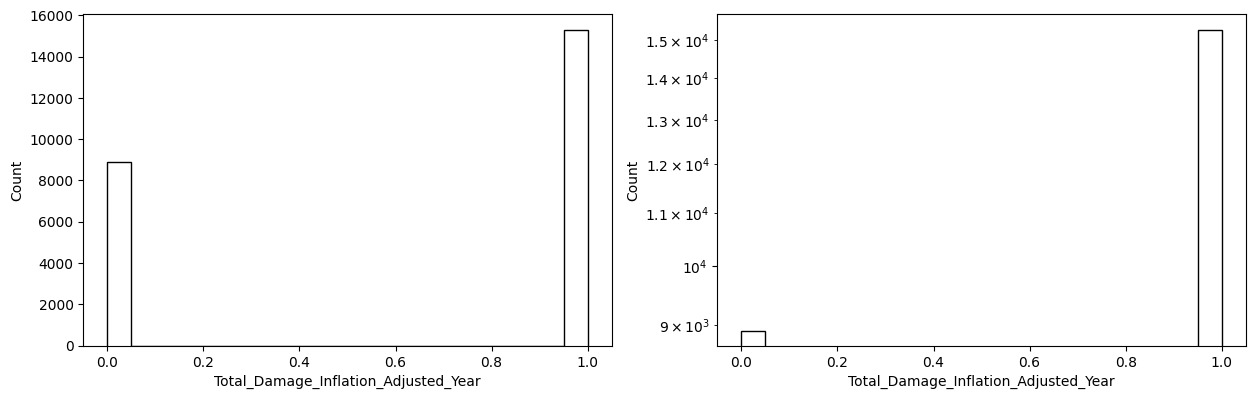

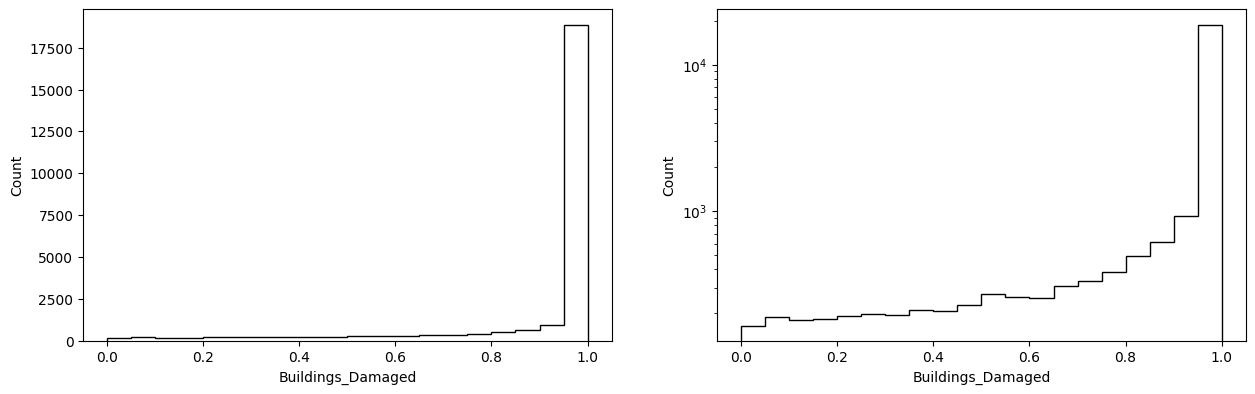

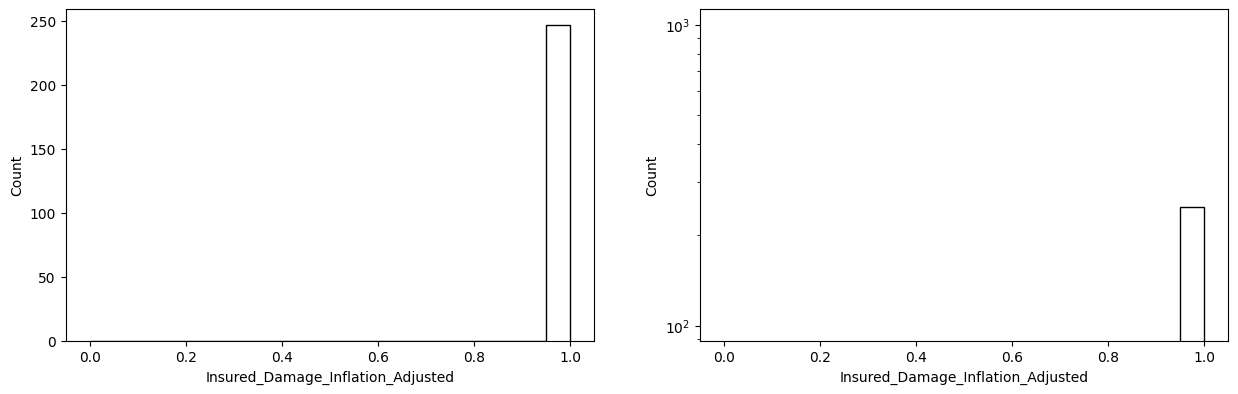

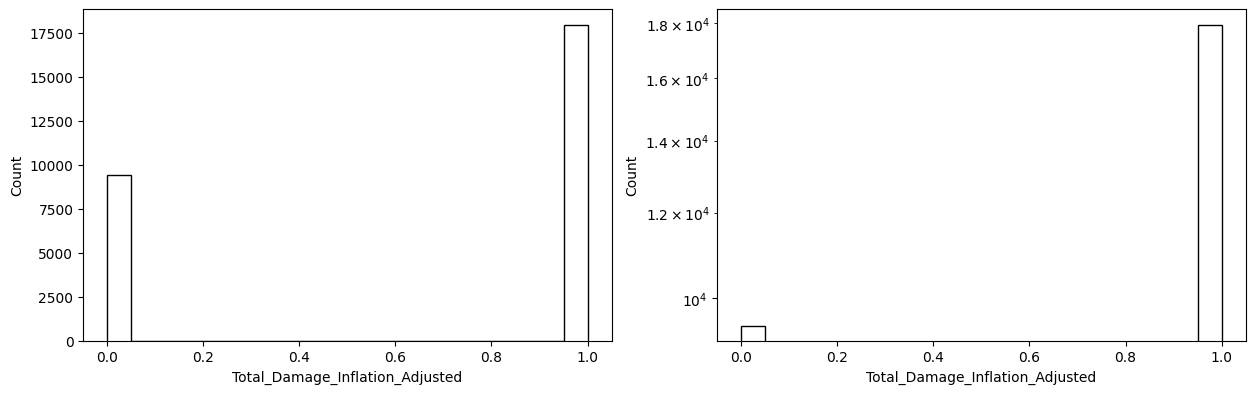

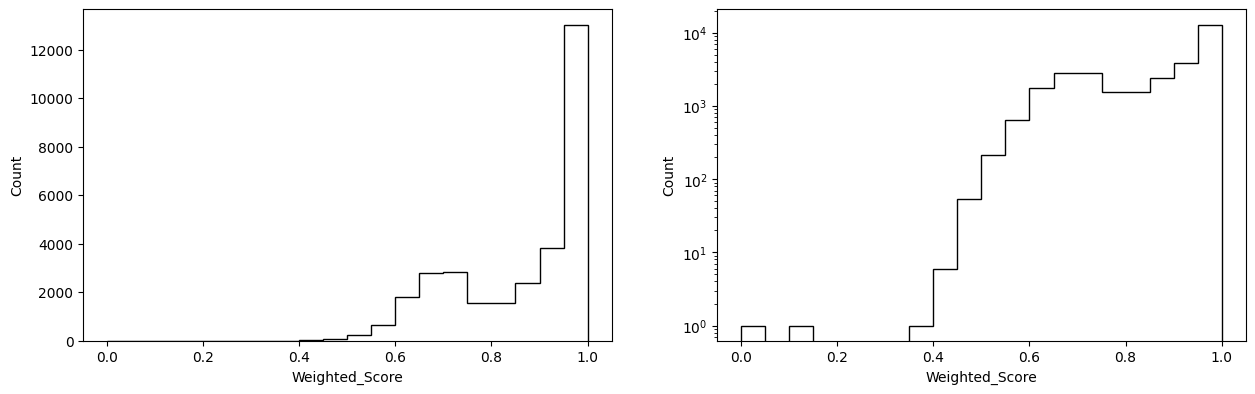

In [7]:
# Plot histograms and scatter plots of weighted scores and coverages
def plot_single_hist(c, l, b, r=(0, 1)):
    all_comps.plot.hist(column=[c], bins=b, range=r, color="Black", legend=False, 
                        xlabel=l, ylabel="Count", histtype="step", log=True)

def plot_dual_hist(c, l, b, r=(0, 1)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4.3))
    all_comps.plot.hist(column=[c], bins=b, range=r, color="Black", legend=False, 
                        xlabel=l, ylabel="Count", histtype="step", log=False, ax=axes[0])
    all_comps.plot.hist(column=[c], bins=b, range=r, color="Black", legend=False, 
                        xlabel=l, ylabel="Count", histtype="step", log=True, ax=axes[1])

plot_tuples = [
         ("Insured_Damage_Units"),
         ("Total_Damage_Units"),
         ("Location"),
         ("Single_Date"),
         ("Start_Date"),
         ("End_Date"),
         ("Total_Deaths"),
         ("Num_Injured"),
         ("Displaced_People"),
         ("Num_Homeless"),
         ("Total_Affected"),
         ("Insured_Damage"),
         ("Total_Damage"),
         ("Total_Damage_Inflation_Adjusted_Year"),
         ("Buildings_Damaged"),
         ("Insured_Damage_Inflation_Adjusted"),
         ("Total_Damage_Inflation_Adjusted"),
         ("Weighted_Score"),
         ("Insured_Damage_Inflation_Adjusted_Year"),
        ]

for i in range(len(plot_tuples)-1):
    plot_dual_hist(plot_tuples[i], plot_tuples[i], 20, (0, 1))

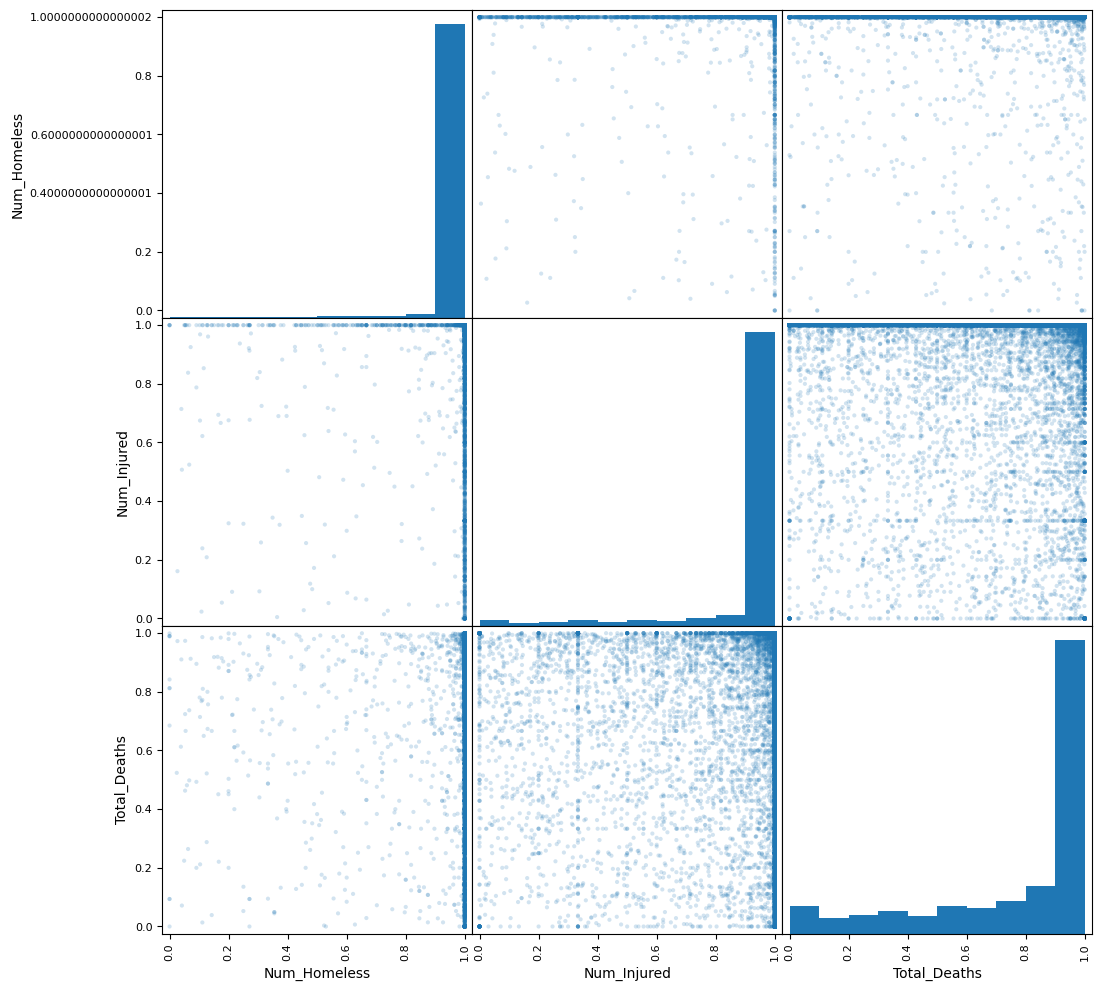

In [8]:
# Plot histograms and pairwise scatter plots for selected fields
fields = [#"Total_Damage", 
          #"Buildings_Damaged",
          #"Total_Affected", 
          #"Displaced_People", 
          "Num_Homeless",
          "Num_Injured",
          "Total_Deaths",
          #"Weighted_Score"
          ]
p = pd.plotting.scatter_matrix(all_comps[fields].convert_dtypes(), alpha=0.2, figsize=(12, 12))

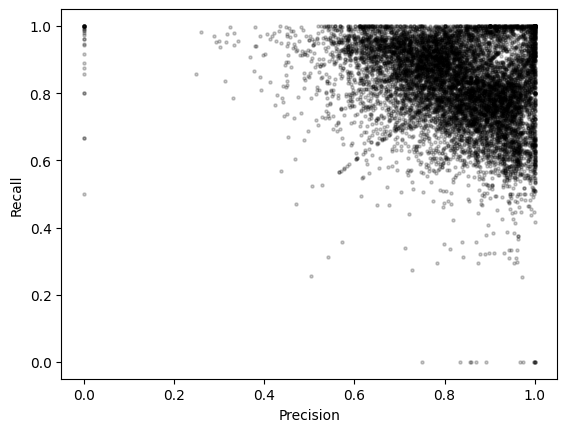

In [41]:
# Sample two subsets of events and measure precision and recall

# Number of comparisons
num_comparisons = 10000

# Minimum and maximum number of events per set
n_min, n_max = 1, 10

results = [comp.events(random.sample(events, random.randint(n_min, n_max)), \
                       random.sample(events, random.randint(n_min, n_max)), weights) \
           for i in range(num_comparisons)]

# Scatter plot with precision and recall
plt.scatter([p for (p, r) in results], [r for (p, r) in results], s=5, c="k", alpha=0.2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

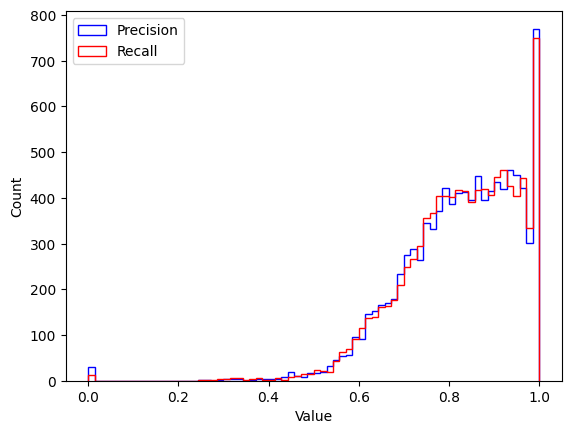

In [45]:
precisions = [p for (p, r) in results]
recalls = [r for (p, r) in results]

plt.hist(precisions, bins=70, color="Blue", histtype="step", log=False)
plt.hist(recalls, bins=70, color="Red", histtype="step", log=False)
plt.legend(["Precision", "Recall"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()